## 6-APR ASS-1

#1

The mathematical formula for a linear Support Vector Machine (SVM) is as follows:

Given a set of training examples {x1, x2, ..., xn} where each example xi is a d-dimensional vector, and the corresponding labels {y1, y2, ..., yn}, where yi is either +1 or -1, the objective of a linear SVM is to find a hyperplane in the d-dimensional feature space that separates the two classes with maximum margin.

The hyperplane is defined by a vector w and a scalar b such that the classification rule for a new example x is given by:

- f(x) = sign(w * x + b)

where "sign" is the sign function which returns +1 if the argument is positive, -1 if the argument is negative, and 0 if the argument is zero.

The optimal hyperplane is obtained by solving the following optimization problem:

- minimize: 0.5 * ||w||^2
- subject to: yi(w * xi + b) >= 1, for i = 1, 2, ..., n

- where ||w|| is the Euclidean norm of the weight vector w, and the constraints ensure that all examples are correctly classified and lie on the correct side of the hyperplane with a margin of at least 1.

#2

The objective function of a linear Support Vector Machine (SVM) is to find a hyperplane in the d-dimensional feature space that separates the two classes with maximum margin. The optimization problem associated with this objective is a constrained quadratic optimization problem, which can be written as:

minimize: 0.5 * ||w||^2
subject to: yi(w * xi + b) >= 1, for i = 1, 2, ..., n

where w is the weight vector, b is the bias term, xi is the i-th training example, yi is its corresponding label (+1 or -1), and n is the total number of training examples.

#3
- The kernel trick is a technique used in Support Vector Machines (SVMs) to extend their capability to solve nonlinear classification problems by implicitly mapping the input data into a high-dimensional feature space.

- In a linear SVM, the decision boundary is a hyperplane that separates the two classes. However, in cases where the classes are not linearly separable, the data can be transformed to a higher-dimensional space where a linear hyperplane can separate the classes. The kernel trick avoids the need to explicitly compute the transformation by defining a kernel function that computes the dot product of the data in the high-dimensional space without explicitly computing the mapping.

- The kernel function takes two input vectors x and z and outputs the dot product of their corresponding transformed feature vectors, K(x, z) = φ(x)⋅φ(z). The most commonly used kernel functions are the linear kernel, polynomial kernel, and radial basis function (RBF) kernel.


#4

In Support Vector Machines (SVMs), support vectors are the training examples that lie closest to the decision boundary, also known as the maximum margin hyperplane. The SVM algorithm learns the decision boundary by identifying the support vectors and using them to define the maximum margin hyperplane.

The role of support vectors in SVM is crucial because they determine the position and orientation of the decision boundary. The SVM algorithm aims to maximize the margin between the decision boundary and the closest support vectors, as this helps to reduce the generalization error and improve the classifier's performance on new, unseen data.

#5
- HYPERPLANE:
A hyperplane is a decision boundary that separates the two classes in SVM. In a binary classification problem, the hyperplane is a linear boundary that separates the positive examples from the negative ones. The hyperplane is represented by the equation w·x + b = 0, where w is the weight vector, x is the feature vector, and b is the bias term. The goal of SVM is to find the hyperplane that maximizes the margin between the two classes. 

- MARGINAL PLANE:
The marginal plane is a boundary that is parallel to the hyperplane and is equidistant from the two classes. The distance between the marginal plane and the hyperplane is called the margin. In a binary classification problem, the SVM algorithm tries to find the hyperplane that maximizes the margin between the two classes. The margin is defined by the distance between the hyperplane and the closest examples of each class.

- SOFT MARGIN:
In some cases, the dataset is not linearly separable, and it is not possible to find a hyperplane that perfectly separates the two classes. In such cases, we can use a soft margin SVM, which allows some examples to be misclassified to find a better decision boundary. The soft margin SVM introduces a slack variable that allows some examples to be on the wrong side of the margin or the wrong side of the hyperplane. The slack variable is penalized in the objective function, and the goal of the SVM is to minimize the sum of the slack variables while finding the hyperplane that maximizes the margin

In [1]:
#6

from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = load_iris()

In [3]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['Target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [11]:
from sklearn.svm import SVC

In [12]:
svc = SVC(kernel='linear')

In [13]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [14]:
svc.coef_

array([[-0.04631136,  0.52105578, -1.0030165 , -0.46411816],
       [-0.00641373,  0.17867392, -0.5389119 , -0.29158729],
       [ 0.57613513,  1.19215085, -2.03465638, -1.67923323]])

In [15]:
y_predicted = svc.predict(X_test)

In [16]:
y_predicted

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

In [17]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
22     0
15     0
65     1
11     0
42     0
146    2
51     1
27     0
4      0
32     0
142    2
85     1
86     1
16     0
10     0
Name: Target, dtype: int64

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [19]:
print(accuracy_score(y_predicted,y_test))

1.0


In [20]:
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target


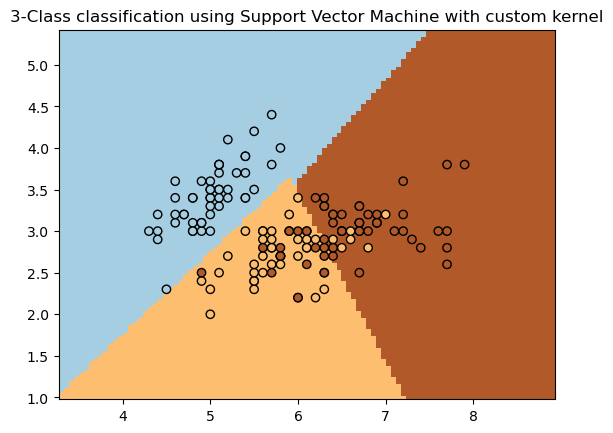

In [21]:
clf = svm.SVC(kernel='linear')
clf.fit(X,y)

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")
plt.title("3-Class classification using Support Vector Machine with custom kernel")
plt.axis("tight")
plt.show()

## 7-APR ASS-2

#1

- Polynomial functions are a class of mathematical functions that involve powers of a variable, x. A polynomial of degree n has the form f(x) = a0 + a1x + a2x^2 + ... + an*x^n, where a0, a1, ..., an are coefficients. Polynomial functions can be used to fit data points by finding the coefficients that minimize the difference between the function and the data points.

- Kernel functions, on the other hand, are used in machine learning algorithms for tasks such as classification and regression. They provide a measure of similarity between pairs of data points in a high-dimensional feature space. The idea is to map the original data points into a higher-dimensional space where they are more easily separable, and then apply a linear algorithm to this space.

- One common type of kernel function is the polynomial kernel, which is a specific type of kernel function that is defined as K(x, y) = (x*y + c)^d, where x and y are data points, c is a constant, and d is a degree parameter. The polynomial kernel function can be used in support vector machines (SVMs) to perform non-linear classification by transforming the data into a higher-dimensional space.

- So, while both polynomial functions and kernel functions involve powers of a variable, they have different purposes in machine learning. Polynomial functions are used for curve fitting, while kernel functions are used for transforming data into a higher-dimensional space to facilitate classification or regression. The polynomial kernel is a specific type of kernel function that uses polynomials to map the data into a higher-dimensional space.

In [22]:
#2

# Import required modules
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate some sample data
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM model with a polynomial kernel
svm_model = svm.SVC(kernel='poly', degree=3)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.895


#3
- In Support Vector Regression (SVR), the parameter epsilon determines the width of the margin around the regression line within which errors are not penalized. Increasing the value of epsilon allows for more errors to be tolerated, which can result in a larger number of support vectors.

- When the value of epsilon is small, the margin around the regression line is narrow, and the model tries to fit the data as closely as possible, resulting in a smaller number of support vectors. On the other hand, when the value of epsilon is large, the margin around the regression line is wider, allowing more errors to be tolerated, resulting in a larger number of support vectors.

#4
- Kernel Function:
The kernel function determines the type of decision boundary to be used in the SVR model. Some commonly used kernel functions are linear, polynomial, radial basis function (RBF), and sigmoid. The choice of kernel function depends on the nature of the data and the problem being solved. For example, a linear kernel may be suitable for linearly separable data, while an RBF kernel may be more appropriate for non-linear data.

- C Parameter:
The C parameter controls the trade-off between achieving a low training error and a low testing error. It determines the penalty for misclassifying data points in the training set. A larger value of C will result in a model with a smaller margin and fewer support vectors, while a smaller value of C will result in a model with a larger margin and more support vectors. Increasing C can lead to overfitting, while decreasing C can lead to underfitting.

- Epsilon Parameter:
The epsilon parameter controls the width of the margin around the regression line within which errors are not penalized. A larger value of epsilon allows for more errors to be tolerated, resulting in a larger number of support vectors and a wider margin. A smaller value of epsilon results in a narrower margin and a smaller number of support vectors. Increasing epsilon can lead to a more flexible model that captures more complex patterns in the data, while decreasing epsilon can result in a simpler model that may generalize better.

- Gamma Parameter:
The gamma parameter controls the shape of the decision boundary in the RBF kernel function. A smaller value of gamma will result in a smoother and more generalized decision boundary, while a larger value of gamma will result in a more complex and localized decision boundary. Increasing gamma can lead to overfitting, while decreasing gamma can lead to underfitting.

In [23]:
#5
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
df = pd.read_csv("diabetes.csv")

In [25]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [27]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

We can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these.
Let's deal with that. we can either remove such data or simply replace it with their respective mean values.
Let's do the latter.

In [28]:
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['Glucose'] = df['Glucose'].replace(0,df['Glucose'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['Insulin'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['SkinThickness'].mean())

In [29]:
df.describe()    # MINIMUM VALUES ARE REPLACED BY THEIR MEANS:

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
# DIVIDING THE DATASET INTO INDEPENDENT AND DEPENDENT FEATURES:

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [31]:
# SEPARATE DATA-SET INTO TRAIN AND TEST

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [13]:
import pickle
from sklearn.preprocessing import StandardScaler

def standar_scaler(X_train,X_test):
    #SCALING THE DATA:
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled,X_test_scaled

In [ ]:
X_train_scaled, X_test_scaled = standar_scaler(X_train, X_test)

In [32]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')

In [33]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [34]:
y_predicted = svc.predict(X_test)

In [35]:
y_predicted

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [36]:
y_test

661    1
122    0
113    0
14     1
529    0
      ..
366    1
301    1
382    0
140    0
463    0
Name: Outcome, Length: 192, dtype: int64

In [37]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [38]:
print(accuracy_score(y_predicted,y_test))

0.7916666666666666


In [39]:
conf_mat = confusion_matrix(y_predicted,y_test)
conf_mat

array([[117,  27],
       [ 13,  35]])

In [40]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [41]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7916666666666666

In [42]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8125

In [43]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.9

In [44]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.854014598540146

## HYPER-PARAMETER TUNING IN SVC:

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
parameters = {'C':[0.1,1,10,100,1000],
              'gamma':[0.1,1,10,100,1000],
             'kernel':['linear','poly','rbf']
             }

In [ ]:
grid = GridSearchCV(estimator=SVC(),param_grid=parameters,cv=5,refit=True,verbose=2)

In [ ]:
grid.fit(X_train,y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
y_new_predicted = grid.predict(X_test)

In [ ]:
print(accuracy_score(y_new_predicted,y_test))

In [ ]:
print(classification_report(y_test,y_new_predicted))

## 8-APRIL ASS-3

#1

In the case of predicting house prices based on several characteristics, a common objective is to minimize the difference between the predicted prices and the actual prices. In this scenario, MSE and RMSE are commonly used metrics, as they both measure the average squared difference between the predicted and actual prices.

However, if the goal is to provide a more interpretable metric that is less sensitive to outliers, MAE is a good choice. MAE measures the average absolute difference between the predicted and actual prices.

#2

If the goal is to predict the actual price of a house as accurately as possible, Mean Squared Error (MSE) is the more appropriate evaluation metric to use for an SVM regression model.

MSE measures the average squared difference between the predicted and actual values, and in the context of predicting the price of a house, it means that the model will penalize large errors more heavily than small ones. This is important because in this scenario, small errors in prediction may not be as critical as large errors that could result in significant financial losses for buyers and sellers.

On the other hand, R-squared measures the proportion of the variance in the dependent variable (house price) that is explained by the independent variables (features used in the model). While R-squared is a useful metric for assessing how well the model fits the data, it does not necessarily provide a good measure of the accuracy of the predicted values themselves.

#3

When dealing with a dataset that contains a significant number of outliers, it is important to choose a regression metric that is robust to outliers. The most appropriate regression metric to use in this scenario would be the mean absolute error (MAE).

MAE is less sensitive to outliers than other regression metrics like mean squared error (MSE) or root mean squared error (RMSE) since it does not square the residuals. Squaring the residuals in MSE and RMSE amplifies the effect of large errors, which can be dominated by outliers, and results in a higher loss value. MAE is calculated as the average absolute difference between the predicted and actual values, making it less affected by extreme values.

#4

- You have built an SVM regression model using a polynomial kernel and are trying to select the best
metric to evaluate its performance. You have calculated both MSE and RMSE and found that both values
are very close. Which metric should you choose to use in this case?

- When both MSE (Mean Squared Error) and RMSE (Root Mean Squared Error) are very close, it is generally recommended to use RMSE as the evaluation metric. The reason is that RMSE has the advantage of being in the same unit as the target variable, which makes it easier to interpret the model's performance. MSE, on the other hand, has the disadvantage of being in squared units, which can be more difficult to interpret.

- Furthermore, RMSE puts more weight on larger errors, which is often desirable in many real-world scenarios. For example, if you are predicting house prices, a large error in predicting an expensive house is likely to be more significant than a large error in predicting a less expensive house.

Therefore, if the MSE and RMSE are very close, it is generally better to choose RMSE as the evaluation metric for your SVM regression model using a polynomial kernel.

#5

- If the goal is to measure how well the model explains the variance in the target variable, the most appropriate evaluation metric to use is the coefficient of determination, also known as R-squared (R2). R2 measures the proportion of variance in the target variable that is explained by the model.

- R2 takes values between 0 and 1, with a higher value indicating that the model is explaining more variance in the target variable. An R2 value of 1 means that the model perfectly predicts the target variable, while an R2 value of 0 means that the model is not explaining any of the variance in the target variable.

- Therefore, to compare the performance of different SVM regression models using different kernels (linear, polynomial, and RBF) in terms of how well they explain the variance in the target variable, R2 would be the most appropriate evaluation metric.